In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
import processing.load_dataset as load_dataset
from processing.load_dataset import generate_dataset

In [3]:
load_dataset.generate_df(load_dataset.img_dir)

,image_path
0,..\data\wiki_crop_filtered_mirrored_pose\10000...
1,..\data\wiki_crop_filtered_mirrored_pose\10002...
2,..\data\wiki_crop_filtered_mirrored_pose\10004...
3,..\data\wiki_crop_filtered_mirrored_pose\10004...
4,..\data\wiki_crop_filtered_mirrored_pose\10005...
...,...
15346,..\data\wiki_crop_filtered_mirrored_pose\99941...
15347,..\data\wiki_crop_filtered_mirrored_pose\99964...
15348,..\data\wiki_crop_filtered_mirrored_pose\99966...
15349,..\data\wiki_crop_filtered_mirrored_pose\99981...


In [4]:
data, dataset, data_loader = generate_dataset('../data/wiki_crop_cut_pose/') 

In [5]:
data

,image_path
0,..\data\wiki_crop_cut_pose\10000217_1981-05-05...
1,..\data\wiki_crop_cut_pose\10002702_1960-11-09...
2,..\data\wiki_crop_cut_pose\10004299_1908-08-19...
3,..\data\wiki_crop_cut_pose\1000456_1933-06-12_...
4,..\data\wiki_crop_cut_pose\10005947_1981-04-07...
...,...
15371,..\data\wiki_crop_cut_pose\9994102_1992-03-13_...
15372,..\data\wiki_crop_cut_pose\9996412_1933-04-16_...
15373,..\data\wiki_crop_cut_pose\9996683_1929-12-19_...
15374,..\data\wiki_crop_cut_pose\9998109_1972-12-27_...


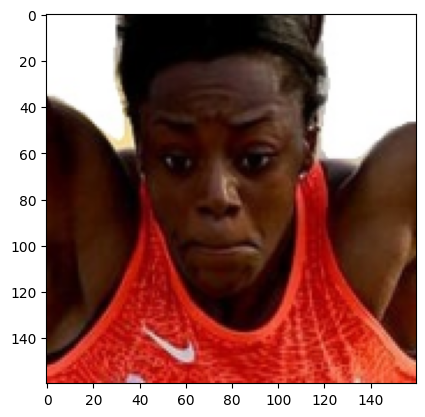

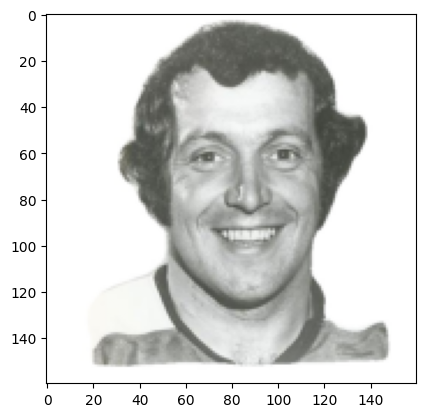

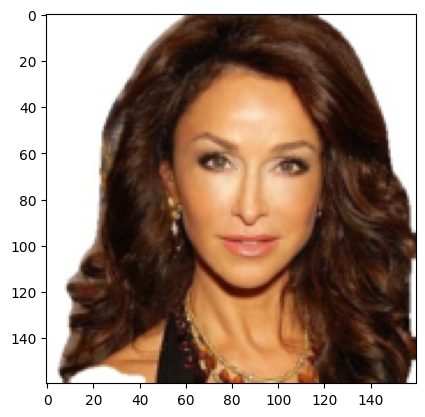

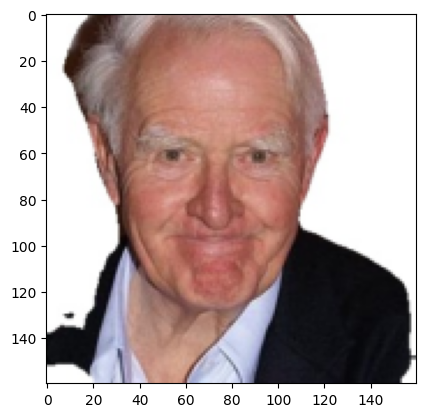

CPU times: total: 328 ms
Wall time: 975 ms


In [6]:
%%time
train_features, target = next(iter(data_loader))
for i in range(4):
    img = train_features[i].squeeze()
    plt.imshow(img)
    plt.show()